In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
import csv
import matplotlib.pyplot as plt

text = "This $string is an $example"
[word for word in text.split() if word.startswith('$') or word.startswith('@')]


['$string', '$example']

In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel("shuffled_gunlaw.xlsx")
df.columns=['i','date','Tweet','label']        
X=df['Tweet']

df.head()

,i,date,Tweet,label
0,0,2019-09-20,@SenSanders Bernie’s promoting a 25% federal t...,for
1,1,2019-09-28,RT @McJovy Wonder how fetus lovers defend Khid...,against
2,2,2019-09-23,RT @chronovarience Texas mass shooting survivo...,for
3,3,2019-09-27,The next time you hear an elite or wealthy Dem...,for
4,4,2019-09-24,@OlofsdotterK @RoyaRahmani @NZAmbassadorUS @Ma...,for


In [2]:
processed_tweets=[]
for tweet in range(0, len(X)):  
    #print (str(X[tweet]))
    #print ("\n\n")
    #[word for word in str(X[tweet]).split() if word.startswith('#') or word.startswith('@')]
    processed_tweet=[]
    for word in str(X[tweet]).split():        
        if word.startswith('#'):
            processed_tweet.append(word)
    processed_tweets.append(' '.join(processed_tweet))    
print (len(processed_tweets))
print (processed_tweets)
df['processed_hashtags']=processed_tweets
df['processed_hashtags'].drop_duplicates()

13685
['#DrainTheDeepState #FridayFeeling #2020Election #DemocraticDebate #GunControl', '', '#NotOneMore #Enough #BullyM…', '#guncontrol #guncontrol', '#GunViolence #TheAtlanticFest #Ukraine', '#gunviolence', '#2A #2AShallNotBeInfringed #GunControl', '#GOPComplicitTraitors #Feels #GOPCorruption #GOPComplicit #GOPCowards #GunControlNow #GunViolence #NRABloodMoney #nraisaterroristorganization #MoscowMitchHatesAmerica #MoscowMitchMassacre', '#GunControl #txlege', '', '#libertarian #internetfreedom', '#MarchForOurLives', '#Libertarian', '#ProtectOurDemocracy #GunViolence #ClimateChange', '#CPC19 #Elections2019 #GunControl #cdnpoli #canadaelection2019 #canada', '#GunControl #EndGunViolence', '#2A #GunControl #Constitution #2AShallNotBeInfringed #freedom', '#GunControl #2AShallNotBeInfringed', '#GunControl', '#baltimore #trump #maga #dem…', '#Share #PlayingNow #Rock #GreenockMusicExplosion #GreenockMusicScene #DontGiveMeAGun #NeverAgain #GunControl #GunControlNow #Share #PlayingNow #Idwp #Gu

0        #DrainTheDeepState #FridayFeeling #2020Electio...
1                                                         
2                             #NotOneMore #Enough #BullyM…
3                                  #guncontrol #guncontrol
4                   #GunViolence #TheAtlanticFest #Ukraine
                               ...                        
13677                                      #gunsKillPeople
13679                    #Democrats #Socialism #Guncontrol
13680                #nswpol #Abortion #ProLife #ProChoice
13681    #ImpeachmentNow #golfer #ThursdayThoughts #jou...
13684    #ExtremeRiskProtectionOrders #ERPO #RedFlag #G...
Name: processed_hashtags, Length: 6522, dtype: object

In [28]:
df['processed_hashtags'].unique()

array(['#DrainTheDeepState #FridayFeeling #2020Election #DemocraticDebate #GunControl',
       '', '#NotOneMore #Enough #BullyM…', ...,
       '#nswpol #Abortion #ProLife #ProChoice',
       '#ImpeachmentNow #golfer #ThursdayThoughts #journalist #boston #girlswhocode #MarchForOurLives',
       '#ExtremeRiskProtectionOrders #ERPO #RedFlag #GunViolence #GVP #RedFlagLaw #GVRO'],
      dtype=object)

In [30]:
j=0
for i in (df['processed_hashtags'].unique()):
    with open ('uqe.csv','a', encoding="utf-8") as res:        
        writer=csv.writer(res)           
        s="{},{}\n".format(i,j)
        res.write(s)
        print (s)
        j+=1

#DrainTheDeepState #FridayFeeling #2020Election #DemocraticDebate #GunControl,0

,1

#NotOneMore #Enough #BullyM…,2

#guncontrol #guncontrol,3

#GunViolence #TheAtlanticFest #Ukraine,4

#gunviolence,5

#2A #2AShallNotBeInfringed #GunControl,6

#GOPComplicitTraitors #Feels #GOPCorruption #GOPComplicit #GOPCowards #GunControlNow #GunViolence #NRABloodMoney #nraisaterroristorganization #MoscowMitchHatesAmerica #MoscowMitchMassacre,7

#GunControl #txlege,8

#libertarian #internetfreedom,9

#MarchForOurLives,10

#Libertarian,11

#ProtectOurDemocracy #GunViolence #ClimateChange,12

#CPC19 #Elections2019 #GunControl #cdnpoli #canadaelection2019 #canada,13

#GunControl #EndGunViolence,14

#2A #GunControl #Constitution #2AShallNotBeInfringed #freedom,15

#GunControl #2AShallNotBeInfringed,16

#GunControl,17

#baltimore #trump #maga #dem…,18

#Share #PlayingNow #Rock #GreenockMusicExplosion #GreenockMusicScene #DontGiveMeAGun #NeverAgain #GunControl #GunControlNow #Share #PlayingNow #Idwp #GunCo

In [35]:
df4=pd.read_csv('uqe.csv')
df4.columns=['unique_hashtags','index']
df4

,unique_hashtags,index
0,NaN,1
1,#NotOneMore #Enough #BullyM…,2
2,#guncontrol #guncontrol,3
3,#GunViolence #TheAtlanticFest #Ukraine,4
4,#gunviolence,5
5,#2A #2AShallNotBeInfringed #GunControl,6
6,#GOPComplicitTraitors #Feels #GOPCorruption #G...,7
7,#GunControl #txlege,8
8,#libertarian #internetfreedom,9
9,#MarchForOurLives,10


In [36]:
process_tweets=[]
for tweet in range(0, len(X)):  
    #print (str(X[tweet]))
    #print ("\n\n")
    #[word for word in str(X[tweet]).split() if word.startswith('#') or word.startswith('@')]
    process_tweet=[]
    for word in str(X[tweet]).split():        
        if word.startswith('@'):
            process_tweet.append(word)
    process_tweets.append(' '.join(process_tweet))    
print (len(process_tweets))
df['Processed_mentions']=process_tweets
df

13685


,i,date,Tweet,label,processed_hashtags,Processed_mentions
0,0,2019-09-20,@SenSanders Bernie’s promoting a 25% federal t...,for,#DrainTheDeepState #FridayFeeling #2020Electio...,@SenSanders
1,1,2019-09-28,RT @McJovy Wonder how fetus lovers defend Khid...,against,,@McJovy
2,2,2019-09-23,RT @chronovarience Texas mass shooting survivo...,for,#NotOneMore #Enough #BullyM…,@chronovarience
3,3,2019-09-27,The next time you hear an elite or wealthy Dem...,for,#guncontrol #guncontrol,@MrColionNoir @DLoesch @StacyOnTheRight @NRA
4,4,2019-09-24,@OlofsdotterK @RoyaRahmani @NZAmbassadorUS @Ma...,for,#GunViolence #TheAtlanticFest #Ukraine,@OlofsdotterK @RoyaRahmani @NZAmbassadorUS @Ma...
5,5,2019-09-25,Arizona State Representative Jen Longdon is a ...,for,#gunviolence,
6,6,2019-09-20,@KamalaHarris A LOT more if @senatemajldr and ...,for,#2A #2AShallNotBeInfringed #GunControl,@KamalaHarris @senatemajldr @SenateGOP
7,7,2019-09-26,Ugh Straight to the heart\n\n#GOPComplicitTrai...,for,#GOPComplicitTraitors #Feels #GOPCorruption #G...,
8,8,2019-09-19,More Democrats jumping on board for #GunContro...,for,#GunControl #txlege,
9,9,2019-09-27,RT @gun_control_ca These doctors speak the tru...,for,,@gun_control_ca


In [37]:
#s Freq

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=df['processed_hashtags'].astype('U')
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:len(df)])

[('guncontrol', 3715), ('gunviolence', 1983), ('prolife', 1752), ('ar15', 1507), ('libertarian', 1202), ('2a', 953), ('maga', 790), ('2ndamendment', 661), ('guncontrolnow', 538), ('marchforourlives', 527), ('guns', 518), ('gunsense', 448), ('nra', 435), ('democrats', 337), ('trump', 335), ('usa', 335), ('2adefender', 330), ('liberty', 325), ('tcot', 280), ('tlot', 259), ('freedom', 250), ('gunreformnow', 243), ('colt', 227), ('trump2020', 218), ('resist', 211), ('2ashallnotbeinfringed', 210), ('climatechange', 209), ('gop', 196), ('politics', 192), ('gunrights', 189), ('kag', 181), ('conservative', 167), ('conservatives', 166), ('meme', 148), ('news', 148), ('teaparty', 146), ('abortion', 145), ('kag2020', 143), ('betoorourke', 142), ('gun', 141), ('conservativememes', 141), ('constitution', 140), ('firearms', 138), ('beto2020', 134), ('biggovsucks', 132), ('socialismsucks', 131), ('cdnpoli', 127), ('ethics', 127), ('secondamendment', 126), ('endgunviolence', 119), ('moscowmitch', 115)

In [39]:
hash=[]
freq=[]
count=0
for i,f in words_freq:
    print (i,f)
    count+=1
    if count<15:
        hash.append(i)
        freq.append(f)

guncontrol 3715
gunviolence 1983
prolife 1752
ar15 1507
libertarian 1202
2a 953
maga 790
2ndamendment 661
guncontrolnow 538
marchforourlives 527
guns 518
gunsense 448
nra 435
democrats 337
trump 335
usa 335
2adefender 330
liberty 325
tcot 280
tlot 259
freedom 250
gunreformnow 243
colt 227
trump2020 218
resist 211
2ashallnotbeinfringed 210
climatechange 209
gop 196
politics 192
gunrights 189
kag 181
conservative 167
conservatives 166
meme 148
news 148
teaparty 146
abortion 145
kag2020 143
betoorourke 142
gun 141
conservativememes 141
constitution 140
firearms 138
beto2020 134
biggovsucks 132
socialismsucks 131
cdnpoli 127
ethics 127
secondamendment 126
endgunviolence 119
moscowmitch 115
americafirst 112
maga2020 111
ak47 109
government 108
molonlabe 106
prolifeun 105
walkaway 102
impeachtrump 102
poverty 100
homelessness 98
beto 97
elxn43 97
housing 94
charity 91
homeless 90
america 90
buildthewall 89
wwg1wga 88
progun 87
prochoice 87
abortionismurder 86
assaultweaponsban 83
democrat 82

In [40]:
print (hash)

['guncontrol', 'gunviolence', 'prolife', 'ar15', 'libertarian', '2a', 'maga', '2ndamendment', 'guncontrolnow', 'marchforourlives', 'guns', 'gunsense', 'nra', 'democrats']


In [41]:
print (freq)

[3715, 1983, 1752, 1507, 1202, 953, 790, 661, 538, 527, 518, 448, 435, 337]


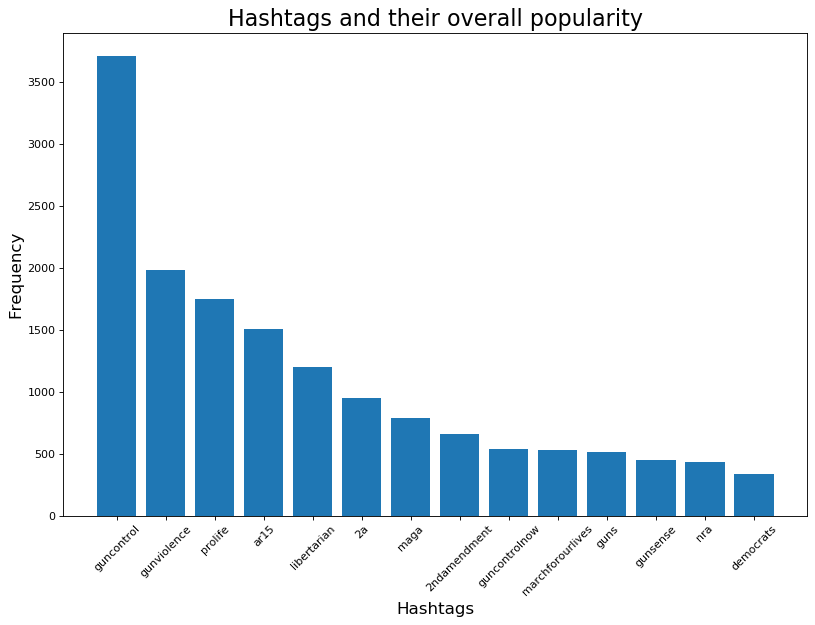

In [42]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# this is for plotting purpose
#index = np.arange(len(x))
plt.bar(hash, freq)
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Hashtags and their overall popularity', fontsize=20)
plt.show()
    

In [46]:
df6=pd.read_csv('f_a2.csv')
df6.columns=['i','date','Tweet','label']        

df6.head()

,i,date,Tweet,label
0,2,2019-09-23,rt chronovarience texas mass shooting survivor...,for
1,3,2019-09-27,time hear elite wealthy democrat guncontrol re...,for
2,4,2019-09-24,olofsdotterk royarahmani nzambassadorus mars...,for
3,5,2019-09-25,arizona state representative jen longdon gunvi...,for
4,6,2019-09-20,kamalaharris lot senatemajldr senategop stup...,for


In [47]:
import spacy
nlp = spacy.load("en_core_web_sm")
ner={'PERSON':0,'NORP':0,'FAC':0,'ORG':0,'GPE':0,'LOC':0,'PRODUCT':0,'EVENT':0,'WORK_OF_ART':0,'LAW':0,'LANGUAGE':0,'DATE':0,'TIME':0,'PERCENT':0,'MONEY':0,'QUANTITY':0,'ORDINAL':0,'CARDINAL':0}
PERSON=[]
NORP=[]
FAC=[]
ORG=[]
GPE=[]
LOC=[]
PRODUCT=[]
EVENT=[]
WORK_OF_ART=[]
LAW=[]
LANGUAGE=[]
DATE=[]
TIME=[]
PERCENT=[]
MONEY=[]
QUANTITY=[]
ORDINAL=[]
CARDINAL=[]
for txt in df6['Tweet']:
    ner={'PERSON':0,'NORP':0,'FAC':0,'ORG':0,'GPE':0,'LOC':0,'PRODUCT':0,'EVENT':0,'WORK_OF_ART':0,'LAW':0,'LANGUAGE':0,'DATE':0,'TIME':0,'PERCENT':0,'MONEY':0,'QUANTITY':0,'ORDINAL':0,'CARDINAL':0}
    doc = nlp(txt)
    for ent in doc.ents:
        ner[ent.label_]=ner[ent.label_]+1
    PERSON.append(ner['PERSON'])
    NORP.append(ner['NORP'])
    FAC.append(ner['FAC'])
    ORG.append(ner['ORG'])
    GPE.append(ner['GPE'])
    LOC.append(ner['LOC'])
    PRODUCT.append(ner['PRODUCT'])
    EVENT.append(ner['EVENT'])
    WORK_OF_ART.append(ner['WORK_OF_ART'])
    LAW.append(ner['LAW'])
    LANGUAGE.append(ner['LANGUAGE'])
    DATE.append(ner['DATE'])
    TIME.append(ner['TIME'])
    PERCENT.append(ner['PERCENT'])
    MONEY.append(ner['MONEY'])
    QUANTITY.append(ner['QUANTITY'])
    ORDINAL.append(ner['ORDINAL'])
    CARDINAL.append(ner['CARDINAL'])
df6['PERSON']=PERSON
df6['NORP']=NORP
df6['FAC']=FAC
df6['ORG']=ORG
df6['GPE']=GPE
df6['LOC']=LOC
df6['PRODUCT']=PRODUCT
df6['EVENT']=EVENT
df6['WORK_OF_ART']=WORK_OF_ART
df6['LAW']=LAW
df6['LANGUAGE']=LANGUAGE
df6['DATE']=DATE
df6['TIME']=TIME
df6['PERCENT']=PERCENT
df6['MONEY']=MONEY
df6['QUANTITY']=QUANTITY
df6['ORDINAL']=ORDINAL
df6['CARDINAL']=CARDINAL

In [48]:
df6

,i,date,Tweet,label,PERSON,NORP,FAC,ORG,GPE,LOC,...,WORK_OF_ART,LAW,LANGUAGE,DATE,TIME,PERCENT,MONEY,QUANTITY,ORDINAL,CARDINAL
0,2,2019-09-23,rt chronovarience texas mass shooting survivor...,for,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2019-09-27,time hear elite wealthy democrat guncontrol re...,for,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2019-09-24,olofsdotterk royarahmani nzambassadorus mars...,for,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5,2019-09-25,arizona state representative jen longdon gunvi...,for,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6,2019-09-20,kamalaharris lot senatemajldr senategop stup...,for,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,2019-09-26,ugh straight heart gopcomplicittraitors feels ...,for,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,2019-09-19,democrats jumping board guncontrol surprising ...,for,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,2019-09-27,rt gun_control_ca doctors speak truth lines co...,for,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,2019-09-27,rt dgolumbia perfect libertarian internetfreedom,against,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,2019-09-25,believe guys marchforourlives,for,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
